# Data Visualization Exercise (Core) - Solution


*   Solution By: Niño Lepardo
*   02/07/22


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Data set selected "[2020/W36: Calories and Sugar in Cereals](https://data.world/makeovermonday/2020w36)"

In [3]:
filename='/content/drive/MyDrive/CD_DataScience/cereal.xlsx'
df = pd.read_excel(filename)
df.head()

,cereal,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
1,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
2,Basic 4,General Mills,Cold,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
3,Cheerios,General Mills,Cold,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999
4,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573


In [4]:
# Set the first row (index 0) as the new column name
# Drop index 0 since we set it as the new column names

df.columns = df.iloc[0]
df.drop([0], axis=0, inplace=True)
#df.reset_index(drop=True)
df.head()

,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
1,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
2,Basic 4,General Mills,Cold,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
3,Cheerios,General Mills,Cold,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999
4,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573
5,Clusters,General Mills,Cold,110,3,2,140,2,13,7,105,25,3,1,0.5,40.400208


### Clean Data

In [5]:
# Check for any inconsistency

df['name'].unique()

array(['Apple Cinnamon Cheerios', 'Basic 4', 'Cheerios',
       'Cinnamon Toast Crunch', 'Clusters', 'Cocoa Puffs',
       'Count Chocula', 'Crispy Wheat & Raisins', 'Golden Grahams',
       'Honey Nut Cheerios', 'Kix', 'Lucky Charms',
       'Multi-Grain Cheerios', 'Oatmeal Raisin Crisp', 'Raisin Nut Bran',
       'Total Corn Flakes', 'Total Raisin Bran', 'Total Whole Grain',
       'Triples', 'Trix', 'Wheaties', 'Wheaties Honey Gold', 'All-Bran',
       'All-Bran with Extra Fiber', 'Apple Jacks', 'Corn Flakes',
       'Corn Pops', "Cracklin' Oat Bran", 'Crispix', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats', 'Fruitful Bran',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut',
       'Mueslix Crispy Blend', 'Nut&Honey Crunch',
       'Nutri-Grain Almond-Raisin', 'Nutri-grain Wheat', 'Product 19',
       'Raisin Bran', 'Raisin Squares', 'Rice Krispies', 'Smacks',
       'Special K', '100% Bran', 'Shredded Wheat',
       "Shredded Wheat 'n'Bran", 'Shredded W

In [6]:
# replace mispelled name

df['name'] = df['name'].replace('Fruit & Fibre Dates; Walnuts; and Oats','Fruit & Fibre: Dates, Walnuts & Oats')
df['name'] = df['name'].replace('Muesli Raisins; Dates; & Almonds','Muesli Raisins: Dates & Almonds')
df['name'] = df['name'].replace('Muesli Raisins; Peaches; & Pecans','Muesli Raisins: Peaches & Pecans')
df['name'].unique()


array(['Apple Cinnamon Cheerios', 'Basic 4', 'Cheerios',
       'Cinnamon Toast Crunch', 'Clusters', 'Cocoa Puffs',
       'Count Chocula', 'Crispy Wheat & Raisins', 'Golden Grahams',
       'Honey Nut Cheerios', 'Kix', 'Lucky Charms',
       'Multi-Grain Cheerios', 'Oatmeal Raisin Crisp', 'Raisin Nut Bran',
       'Total Corn Flakes', 'Total Raisin Bran', 'Total Whole Grain',
       'Triples', 'Trix', 'Wheaties', 'Wheaties Honey Gold', 'All-Bran',
       'All-Bran with Extra Fiber', 'Apple Jacks', 'Corn Flakes',
       'Corn Pops', "Cracklin' Oat Bran", 'Crispix', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats', 'Fruitful Bran',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut',
       'Mueslix Crispy Blend', 'Nut&Honey Crunch',
       'Nutri-Grain Almond-Raisin', 'Nutri-grain Wheat', 'Product 19',
       'Raisin Bran', 'Raisin Squares', 'Rice Krispies', 'Smacks',
       'Special K', '100% Bran', 'Shredded Wheat',
       "Shredded Wheat 'n'Bran", 'Shredded W

In [7]:
df['Manufacturer'].unique()

array(['General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats',
       'Ralston Purina', 'American Home Food Products'], dtype=object)

In [8]:
df['type'].unique()

array(['Cold', 'Hot'], dtype=object)

In [9]:
# Check for any duplicate

df.duplicated().sum()

0

In [10]:
# Check for null values

df.isnull().sum()

0
name                                               0
Manufacturer                                       0
type                                               0
calories per serving                               0
grams of protein                                   0
grams of fat                                       0
milligrams of sodium                               0
grams of dietary fiber                             0
grams of complex carbohydrates                     0
grams of sugars                                    0
milligrams of potassium                            0
vitamins and minerals (% of FDA recommendation)    0
Display shelf                                      0
Weight in ounces per one serving                   0
Number of cups in one serving                      0
Rating of cereal                                   0
dtype: int64

In [11]:
df.head()

,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
1,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
2,Basic 4,General Mills,Cold,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
3,Cheerios,General Mills,Cold,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999
4,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573
5,Clusters,General Mills,Cold,110,3,2,140,2,13,7,105,25,3,1,0.5,40.400208


### Get the top 10 Cereals with the most sugar

In [12]:
sugar_cereal = df[['name','grams of sugars']].sort_values(by='grams of sugars', ascending=False)
top10_sugar_cereal = sugar_cereal.head(10)
top10_sugar_cereal

,name,grams of sugars
44,Smacks,15
54,Golden Crisp,15
59,Post Nat. Raisin Bran,14
25,Apple Jacks,14
17,Total Raisin Bran,14
6,Cocoa Puffs,13
30,Froot Loops,13
36,Mueslix Crispy Blend,13
7,Count Chocula,13
53,Fruity Pebbles,12


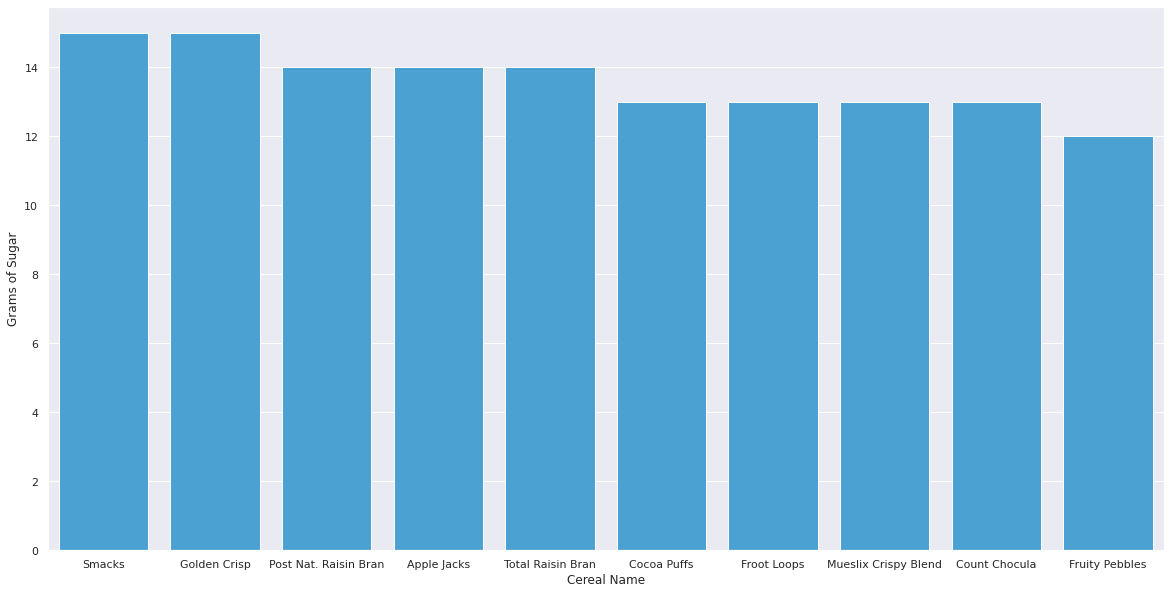

In [13]:
plt.figure(figsize=(20, 10))
sns.set(style='darkgrid')

ax = sns.barplot(
    y='grams of sugars',
    x='name',
    data=top10_sugar_cereal,
    color='#34A7E9'
)
ax.set(xlabel='Cereal Name', ylabel='Grams of Sugar');

### Top 10 cereals with the most calories

In [14]:
df_calories = df[['name','calories per serving']].sort_values(by='calories per serving', ascending=False)
top10_calories = df_calories.head(10)
top10_calories

,name,calories per serving
36,Mueslix Crispy Blend,160
72,Muesli Raisins: Peaches & Pecans,150
71,Muesli Raisins: Dates & Almonds,150
38,Nutri-Grain Almond-Raisin,140
17,Total Raisin Bran,140
35,Just Right Fruit & Nut,140
2,Basic 4,130
14,Oatmeal Raisin Crisp,130
37,Nut&Honey Crunch,120
41,Raisin Bran,120


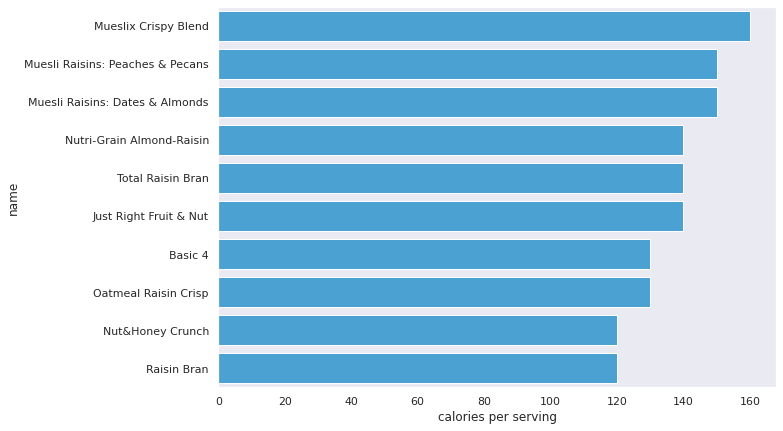

In [15]:
sns.set(style='dark')

plt.figure(figsize=(10, 7))

sns.barplot(x='calories per serving',
            y='name',
            data=top10_calories,
            color='#34A7E9'
            )
ax.set(xlabel='Calories per Serving', ylabel='Cereal Name');

Check the median, quartiles and outlier values of the sodium content

In [16]:
df.head()

,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
1,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
2,Basic 4,General Mills,Cold,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
3,Cheerios,General Mills,Cold,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999
4,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573
5,Clusters,General Mills,Cold,110,3,2,140,2,13,7,105,25,3,1,0.5,40.400208


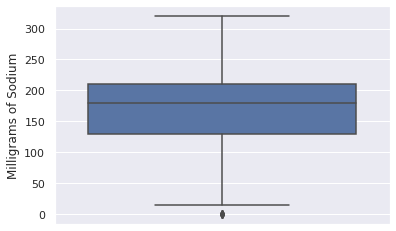

In [17]:
sns.set(style='darkgrid')

ax = sns.boxplot(y=df['milligrams of sodium'])
ax.set(ylabel='Milligrams of Sodium')
plt.show()